<a href="https://colab.research.google.com/github/Pranavi-chowdary99/Pranavi_HDS/blob/main/Copy_of_week10_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 9 Assignment

_MkKinney 6.1_

The work this week has involved using Pandas to load, manipulate, and visualize data.  For this exercise, we're going to be working with some of the price transparency data from [Baptist Health Medical Center](https://www.baptist-health.com/hospital-charges-and-negotiated-rates/) in Little Rock, AR. We've chosen them because their data is relatively easy to reach with Pandas and has some interesting insights.

Note that the files we're working with here are from 2021. Baptist Health has since changed the file format.  This won't work correctly if you try to do it with files downloaded from the website above. It will only work with these files.

---
---

### 41.1 Loading and viewing the data

Here is URL to sample file for Baptist Health:
* https://hds5210-data.s3.amazonaws.com/bhmclr_drg.xlsx

For this first step, we're going to load the DRG data and inspect it using Pandas.  If you download this file and open it in Excel, there will be a few things you notice:
1. The workbook has two sheets: "Pivot" and "Sheet1" - "Sheet1" is the one we want
2. "Sheet1" has three rows before we get to the actual table header - we'll want to skip those rows
3. Also, I've filtered the data to just those DRGs where the cash price is less than 20,000 for demo purposes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://hds5210-data.s3.amazonaws.com/bhmclr_drg.xlsx'

data = pd.read_excel(url, sheet_name='Sheet1', skiprows=3)

In [ ]:
data.shape

(3864, 19)

In [ ]:
data.columns

Index(['Location', 'Code Type', 'Code', 'NDC', 'Rev Code', 'Procedure',
       'Procedure Description', 'Quantity', 'Payer', 'IP Charge',
       'IP Expected Reimbursement', 'MIN_IP_XR', 'MAX_IP_XR', 'IP Cash Price',
       'OP Charge', 'OP Expected Reimbursement', 'MIN_OP_XR', 'MAX_OP_XR',
       'OP Cash Price'],
      dtype='object')

In [ ]:
data.head()

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
0,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 013,NaN,NaN,MS013,"Tracheostomy For Face, Mouth And Neck Diagnose...",1,AETNA [65000],59006.00,31705.95,11936.11,31705.95,15341.56,0,NaN,NaN,NaN,NaN
1,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 022,NaN,NaN,MS022,Intracranial Vascular Procedures With Principa...,1,AETNA [65000],61399.00,61399.00,15963.74,61399.00,15963.74,0,NaN,NaN,NaN,NaN
2,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 024,NaN,NaN,MS024,Craniotomy With Major Device Implant Or Acute ...,1,AETNA [65000],72401.56,NaN,7770.00,23719.14,18824.41,0,NaN,NaN,NaN,NaN
3,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 025,NaN,NaN,MS025,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],76565.21,57449.30,7770.00,57449.30,19906.95,0,NaN,NaN,NaN,NaN
4,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 026,NaN,NaN,MS026,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],64748.06,29999.01,2913.75,29999.01,16834.50,0,NaN,NaN,NaN,NaN


array([[<Axes: title={'center': 'IP Cash Price'}>,
        <Axes: title={'center': 'IP Charge'}>]], dtype=object)

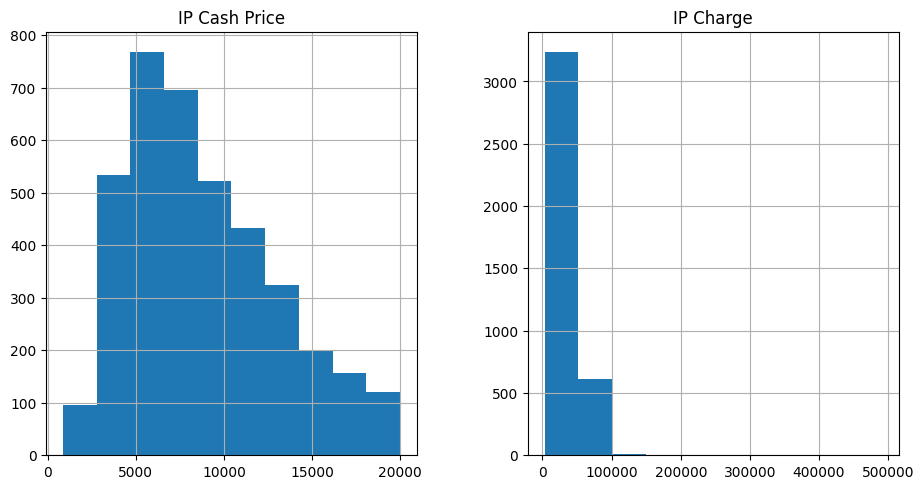

In [ ]:
data[['IP Cash Price','IP Charge']].hist(figsize=(11,5.5))

array([[<Axes: title={'center': 'IP Cash Price'}>,
        <Axes: title={'center': 'IP Charge'}>]], dtype=object)

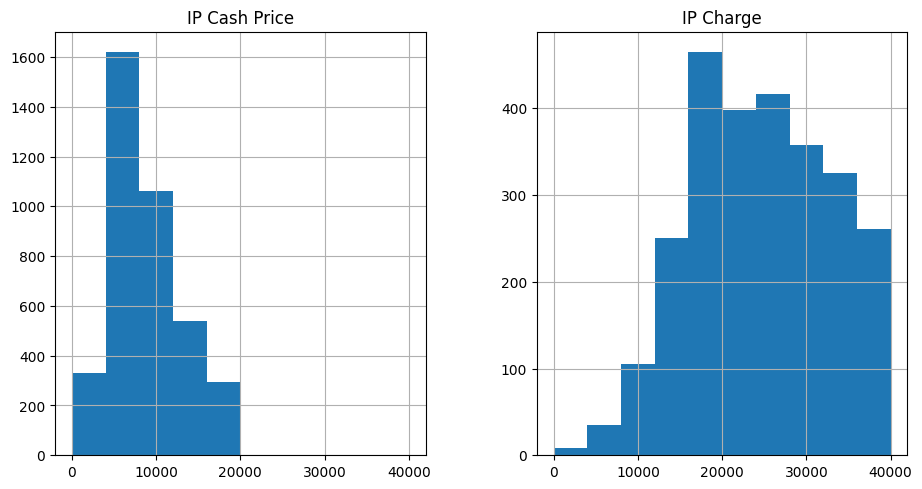

In [ ]:
data[['IP Cash Price','IP Charge']].hist(range=[0,40000], figsize=(11,5.5))

In [ ]:
high_cost_filter = data['IP Charge'] > 100000
data.loc[high_cost_filter]

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
800,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ALLWELL [15100],120026.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
858,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ALLWELL [15100],102435.46,16684.09,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
934,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 461,NaN,NaN,MS461,Bilateral Or Multiple Major Joint Procedures O...,1,ALLWELL [15100],121126.29,NaN,8741.25,9225.00,NaN,0,NaN,NaN,NaN,NaN
1171,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 802,NaN,NaN,MS802,Other O.R. Procedures Of The Blood And Blood F...,1,ALLWELL [15100],143667.09,NaN,9725.00,10204.12,10204.12,0,NaN,NaN,NaN,NaN
1264,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 939,NaN,NaN,MS939,O.R. Procedures With Diagnoses Of Other Contac...,1,ALLWELL [15100],480809.48,NaN,7790.37,7790.37,7790.37,0,NaN,NaN,NaN,NaN
1945,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 037,NaN,NaN,MS037,Extracranial Procedures With McC,1,ARKANSAS TOTAL CARE [40700],123035.47,NaN,17816.08,39275.00,17816.08,0,NaN,NaN,NaN,NaN
2091,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ARKANSAS TOTAL CARE [40700],121981.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2138,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 333,NaN,NaN,MS333,Rectal Resection With Cc,1,ARKANSAS TOTAL CARE [40700],128929.41,NaN,12824.58,26704.23,15975.34,0,NaN,NaN,NaN,NaN
2149,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ARKANSAS TOTAL CARE [40700],104304.46,NaN,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
2192,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 408,NaN,NaN,MS408,Biliary Tract Procedures Except Only Cholecyst...,1,ARKANSAS TOTAL CARE [40700],108898.78,NaN,19861.16,22240.28,19861.16,0,NaN,NaN,NaN,NaN


### Question:

**What do you observe from the histograms above?**

### YOUR RESPONSE:

The database contains financial and procedural data from Baptist Health Medical Center, primarily for treatments viewed as "DRG." Each item contains the procedure code, a detailed description of the process, and the associated charges. The financial information comprises the charge rate ("IP Charge"), anticipated reimbursement, minimum and maximum inpatient rates, cash costs, and other relevant variables. This information appears to provide a detailed understanding of the pricing structure of the center's many medical services, raising awareness of both treatment kinds and the financial implications associated with them.

---

### 41.2 Plotting a KDE instead

Instead of a historgam, let's plot overlapping [KDEs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.kde.html).

(0.0, 40000.0)

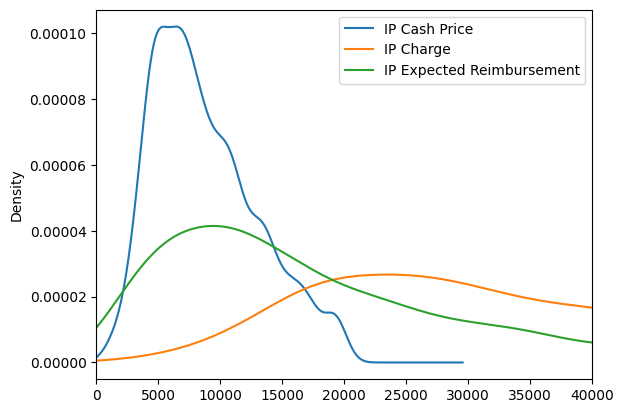

In [ ]:

graph = data[['IP Cash Price','IP Charge','IP Expected Reimbursement']].plot.kde()
graph.set_xlim(0, 40000)

### Question:

If I told you what these values represent, what conclusions could you draw about the pattern?
* IP Cash Price is the amount you would pay on your own without using insurance
* IP Charge is the maximum amount for which the hospital says it can submit a bill to an insurance company
* IP Expected Reimbursement is the amount that the hospital believes it is contracted to receive in payment from an insurance company

### YOUR RESPONSE:
This database comprises specific financial and procedural data of Baptist Health Medical Center, paying attention to treatments that are marked as “DRG.” Every record means an encoded procedure code, verbatim description of the procedure, and likely costs. Such financial information contains basic settings such as the standard charge rate, expected reimbursement, inpatient rate ranges, a cash price, and other critical numbers. This level of analysis provides insight into the formation of its tiered cost structure for other treatments, including the nature of services that are offered together with the associated cost.

However, the histogram for the “IP Cash Price” reveals that most of the services are priced between $5,000 and $10,000. After $10,000, there is a marked drop indicating that there are not many services of high service prices. But when range has been spread till $40,000, histogram act as bar diagram and reveal higher fluctuation of services but in the more focused manner they are again with the $5000 -$10000 and higher variation of services price of between $10000- $40000. This means that though people go to the center for relatively cheaper treatments, the center also provide expensive services.

The “IP Charge” histogram reveals that a large number of treatments are offered in the lower prices band; however, the outliers above one hundred and thousand US dollars suggest the existence of expensive treatments. When the range is limited in $40 000 it looks more balanced and the centre can demonstrate its potential and capacity on providing both, the ordinary, routine service, and the special, more expensive one.

The database containThe Blue Line Curve of IP Cash Price shows cash price without insurance which is how much a patient would need to pay. This result shows that most of treatments are in the lower amount of bills of cash prices for those who would want to pay out of their pocket.

The IP Charge (Orange Line) depicts the amount that a hospital can charge insurance companies based on its cost of delivering services. This curve is broader and shift to the rightward compared to the cash price indicating that the hospitals’ price are generally higher for insurers likely due to negotiation and reimbursement flexibility.

The IP Expected Reimbursement (Green Line) curve demonstrates what the hospital anticipates getting from the insurance providers. This curve is less steep, and shifts to the right, meaning that the expected reimbursement can vary more widely. As with the cash price the peak is not as high as the posted charges however it does fall closer to the lower end of the range meaning that hospitals expect from insurance providers to be more in the ball park of the cash price than the published charges.

Altogether, it can be stated that the charges in hospitals are higher than what is paid by the insurance companies. However, the actual expected reimbursement from insurers tend to bear a closer resemblance to cash prices. This could be actual negotiation power of insurance companies who are able to lower the rates charged or hospitals could set high listed prices knowing full well they will get less from insurance companies.




---

### 41.3 Creating a new set of series

In order to understand how this data varies across different payers, we have to create new data series that are based on the payer information.  In the data, we have a column called **Payer** that holds this information.

We can use the Pandas [groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) function to create groupings based on Payer and then plot kde based on those groupings.  When [plotting a Pandas groupby result](https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.core.groupby.DataFrameGroupBy.plot.html), the options are different than plotting a dataframe.

In [ ]:
data['Payer'].value_counts()

,count
Payer,
ALLWELL [15100],650
ARKANSAS TOTAL CARE [40700],650
AETNA [65000],641
AR BLUE CROSS BLUE SHIELD [25001],641
HEALTHSCOPE [95700],641
MULTIPLAN,641


In [ ]:
data.groupby(['Payer'])['IP Expected Reimbursement'].count()

,IP Expected Reimbursement
Payer,
AETNA [65000],372
ALLWELL [15100],519
AR BLUE CROSS BLUE SHIELD [25001],450
ARKANSAS TOTAL CARE [40700],404
HEALTHSCOPE [95700],641
MULTIPLAN,641


,IP Expected Reimbursement
Payer,
AETNA [65000],"Axes(0.125,0.11;0.775x0.77)"
ALLWELL [15100],"Axes(0.125,0.11;0.775x0.77)"
AR BLUE CROSS BLUE SHIELD [25001],"Axes(0.125,0.11;0.775x0.77)"
ARKANSAS TOTAL CARE [40700],"Axes(0.125,0.11;0.775x0.77)"
HEALTHSCOPE [95700],"Axes(0.125,0.11;0.775x0.77)"
MULTIPLAN,"Axes(0.125,0.11;0.775x0.77)"


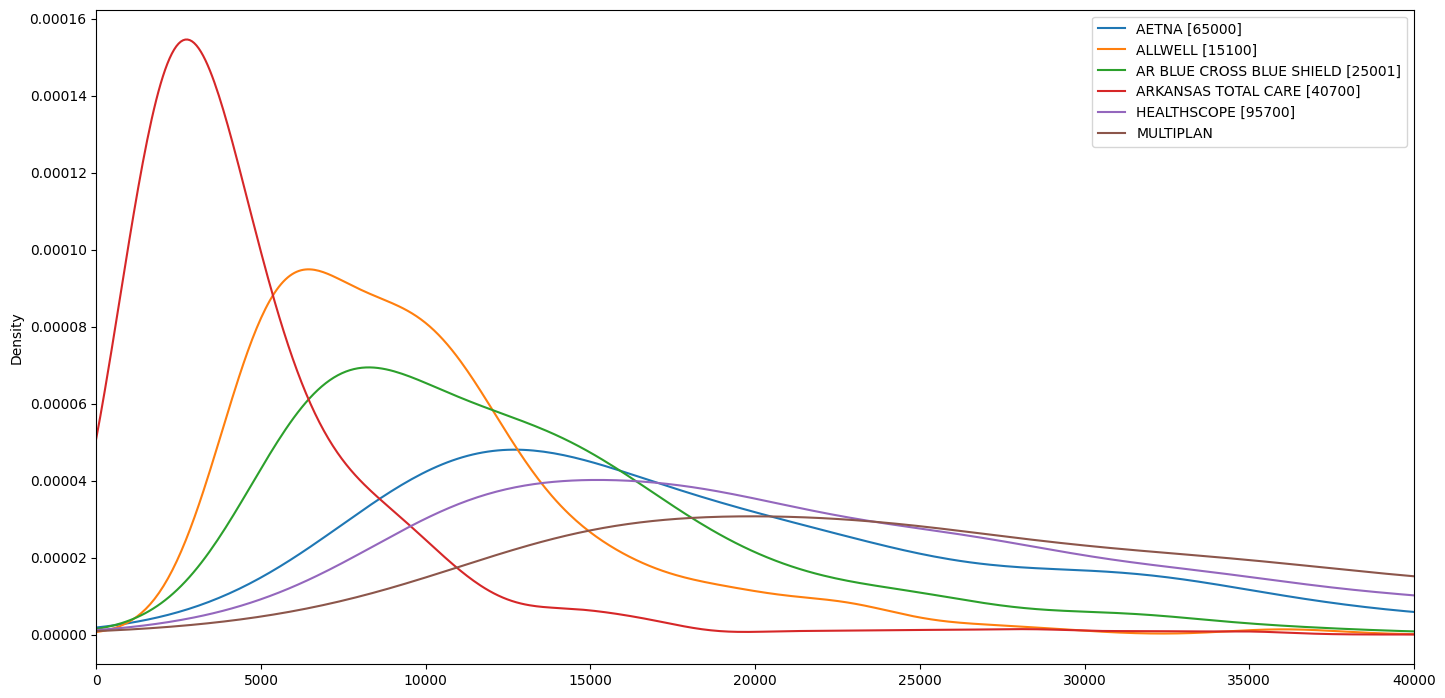

In [ ]:
data.groupby(['Payer'])['IP Expected Reimbursement'].plot.kde(
    xlim=(0,40000),
    legend=True,
    figsize=(17,8.5)
)


### Question:

Remember what this KDE represents. The x-axis is the price being reimbursement for a particular service and the y-axis represents how many different records in the input fall into that price range.  So, the higher the line at any particular x value, the more records are there.

If the line is higher the further left you go, that means most prices are lower.  If the peak of the line is more the the right, then the typical price is higher.

* What do you observe about the patterns in reimbursement above?
* What does that tell you about these particular plans?


### YOUR RESPONSE:

AETNA [65000]: This distribution has a large spike on the left side far from the intermediate point, which means that most services are repaid for an amount less than the other plans. This means that AETNA might be making some of what they pay for the medical expenses lesser than the other insurers, which makes it cheap.

ALLWELL [15100]: The distribution of ALLWELL is shifted slightly to the right of the distribution of AETNA, meaning that although ALLWELL reimburses many services at lower costs, its average reimbursement price for services is still higher than AETNA’s. However, this would suggest that ALLWELL may be able to provide somewhat higher levels of reimbursement, by still maintaining its current cost-effectiveness.

AR BLUE CROSS BLUE SHIELD [25001]: This graph shows that the distribution for AR BLUE CROSS BLUE SHIELD is more spread out with the curve being slightly lower and flatter than the other two paying less steep curve indicating that the reimbursement costs are much higher. Thus, it is possible to observe that there is a shift to the left while drawing the peak, which indicates that the practitioners are not concentrating on the usage of high-cost peak renumeration from the employing organization.

ARKANSAS TOTAL CARE [40700]: The upward sloping of this plan’s curve seems to occur further to the right than AETNA, ALLWELL, or AR BLUE CROSS BLUE SHIELD suggesting that it can reimburse services at a higher total amount. This results in the fact that ARKANSAS TOTAL CARE can cover more expensive treatments, or just have a higher reimbursement rates which can lead to the increase in plan costs.

HEALTHSCOPE [95700]: The distribution for HEALTHSCOPE is almost level, with what appears to be a mode anywhere near the 200s on the left side. This is a clear implication that the organisation provide lots of services but most of the services are those that come with lower reimbursement costs.

MULTIPLAN: The distribution of this plan is the flattest out of all the options, which in turn shows the greatest variation in the reimbursement prices. There is no distinct spike in the number of services, which means that MULTIPLAN provides a combination of services across a broad contract price range without emphasis on one particular price range. This versatility could lead to creation of spaces for the different forms of treatments and charging of handsome amounts for the services.

Interpretation:
Therefore, AETNA is the most appropriate insurance company for clients on a tight budget because it has low reimbursement prices. A comparison of the reimbursement provided by ALLWELL to that offered by AETNA reveals that the former offers the latter’s plans for a marginally higher amount, eschewing extremes of cost and coverage. The reimbursement range of AR BLUE CROSS BLUE SHIELD is fairly spread, which means that there may be fl agenda without focusing specifically on certain prices. Arkansas Total Care sometimes reimburses at higher rates which indicates frequent more comprehensive coverage than which could be more costly for the plans. The many distribution points show a range of services by HEALTHSCOPE, mainly targeting lower reimbursement rates for flexibility in prices. Finally, MULTIPLAN has a large base and a relatively low spread, which how clearly it can provide a entire scale of reimbursement level without focusing on one or two most costly treatments, that can potentially give it versatility for various treatments.









---

### 41.4 Seeing if there's any correlation

So, we know that there are cash prices and insurance paid prices.  How strongly correlated are those amounts?

We can use a scatterplot with one value on the x axis and the other on the y axis to do a simple visualization of this.

<Axes: xlabel='IP Charge', ylabel='IP Expected Reimbursement'>

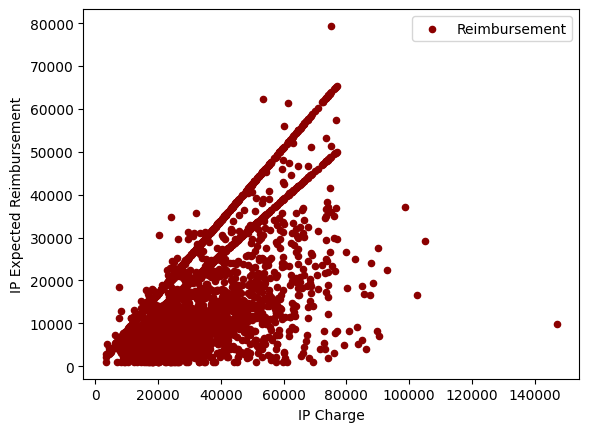

In [ ]:
data.plot.scatter(x='IP Charge', y='IP Expected Reimbursement', color='DarkRed', label='Reimbursement')

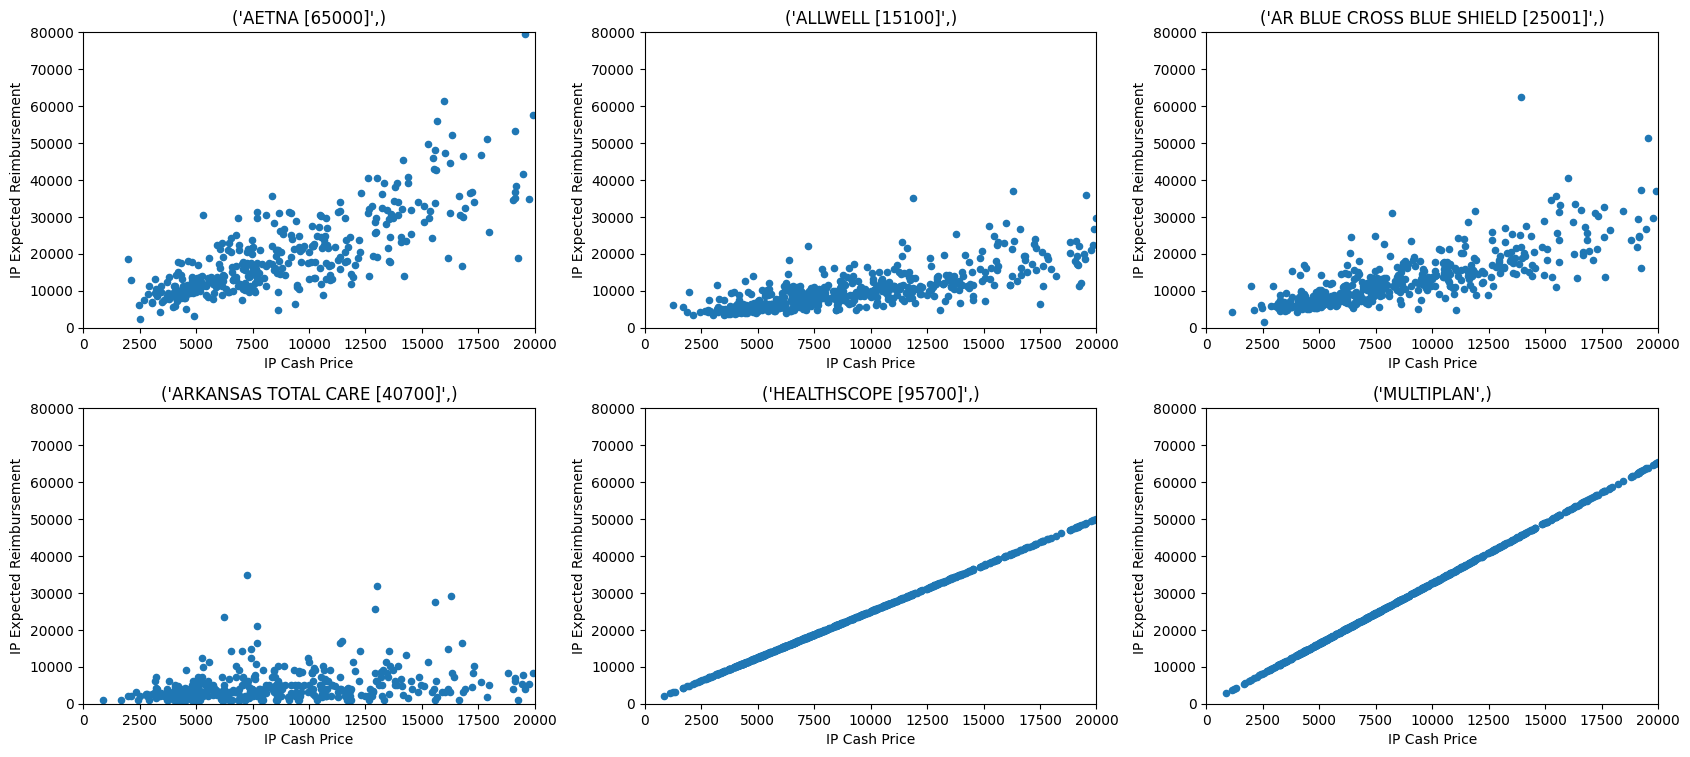

In [ ]:
groups = data.groupby(['Payer'])
plt.figure(figsize=(17,11))

for i, (payer, prices) in enumerate(groups):
    ax = plt.subplot(3,3, i+1)
    prices.plot.scatter(x='IP Cash Price',y='IP Expected Reimbursement',ax=ax)
    ax.set_title(payer)
    ax.set_xlim(0,20000)
    ax.set_ylim(0,80000)

plt.tight_layout()
plt.show()

### YOUR RESPONSE:

AETNA [65000]: When it comes to the visualization of AETNA there are tight clusters of data points in the map in the lower scales for both the IP Cash Price and the Expected Reimbursement. Despite detecting a trend that is fairly linear – if not slightly positive – it becomes clear that reimbursements are not unfluctuating, and can even be random at times. Although, AETNA still prefers to spend less on treatments it sometimes offers more coverage for a procedure. This mild linear trend shows that AETNA remains a little compromising where it offers a variety of services array in healthcare with different level of reimbursements.

ALLWELL [15100]: The graph of characteristics of ALLWELL mainly include only points on both the low IP Cash Price and low Expected Reimbursement. This distribution suggests not only cost leadership and affordability activities but also savings strategies on customers’ part. This lower positive coefficient means that reimbursements are not correspondent to cash prices for service, implying that there is flexibility in how payments are made. Thus, it re-establishes ALLWELL as a cheap platform for acquiring medical services, which will be valuable to those consumers wanting to spend less on this need.

AR BLUE CROSS BLUE SHIELD [25001]: Scatter plot of AR BLUE CROSS BLUE SHIELD shows that the field had data points located at middle of the IP Cash Prices. The variations in reimbursements implying that the actual amounts do not correlate tightly with the service rates also give a weak or no linear correlation. This means that the plan is flexible in that it covers services that can be categorized either as low-cost or mid-range ones, and there is no very clear positive relationship between cash prices and expected reimbursements.

HEALTHSCOPE [95700]: HEALTHSCOPE is illustrated by a linear scatter plot that has a high level of coherence because the points are regularly distributed from the lower part of the chart to the upper section. This shows a predictability in the kinds of Claim Amounts perceived against the levels of IP Cash Price together with the Expected Reimbursement. The strong linear relationship reiterates that as service rates rise, HEALTHSCOPE warrants equivalent service rate changes for better clarity for both consumers and producers in the health sector.

MULTIPLAN: If one examines MULTIPLAN’s scatter plot, a clear progression of the straight line beginning at the lower part of the graph and rising up to the higher part towards the right side makes sense because the closer the IP Cash Price is to the Expected Reimbursement. As much as $2,000, the monthly service price is almost perfectly correlated, which means doers and end-users, from providers to patients, will receive predictable reimbursive values. These ties are close making MULTIPLAN reliable for several healthcare services serving as a guarantee of stable reimbursements.
conclusion:
From the scatter plot of AETNA it can further be inferred that AETNA has geared towards the provision of low cost services which has a varying reimbursement rate aimed at catering for those who seek affordable health care services. This has also been supported by ALLWELL which retains a sharp focus on low cost but does not display the same level of coherency in cash prices and estimated reimbursements. One of the features of reimbursement type that is implemented in the contract of AR BLUE CROSS BLUE SHIELD is flexibility ; it reimburse lower and mid tier services without any outstanding pattern of preferred suppliers. To payers, HEALTHSCOPE traces its reimbursement approaches and patterns in the most foreseeable where its methodologies are unprecedentedly residing parallel with CASH PRICE, all making patients and providers have an appreciated LESS HIDDEN COSTS feeling. MULTIPLAN becomes a very credible plan, thanks to the near line correlation between the costs and the reimbursements, thus meaning that both the low cost and the high cost services are given reasonable reimbursement value.




---

### 41.5 Find Something of Your Own

What data are you interested in?  To earn full credit this week, you'll need to do the following:
1. Bring in some other data that you're interested in visualizing.  You can upload the file to your project directory and work with it here.
2. Read that data in using Pandas
3. Produce at least two different visualizations of that data
4. Write a paragraph that describes your observations of the trends in that data

If you're struggling to find data to use, feel free to reach out to me.  I can make some recommendations on data sets with interesting trends in them.

[Here is a helpful reference for plotting in Pandas.](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [ ]:
# Your code here to load data...
#this is the dataset i have taken to pproduce visualizations from kaggle.
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
url = 'https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset'


data = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
print(data.head)



<bound method NDFrame.head of      Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   O

In [ ]:
data_frame = 'Sleep_health_and_lifestyle_dataset.csv'
sleep_data = pd.read_csv(data_frame)
sleep_data = sleep_data.dropna().reset_index(drop=True)
sleep_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
1,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
2,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
3,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
4,17,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Sleep Apnea


In [ ]:
print("Shape of the DataFrame:")
print(sleep_data.shape)


Shape of the DataFrame:
(155, 13)


In [ ]:
print(sleep_data.columns)

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')


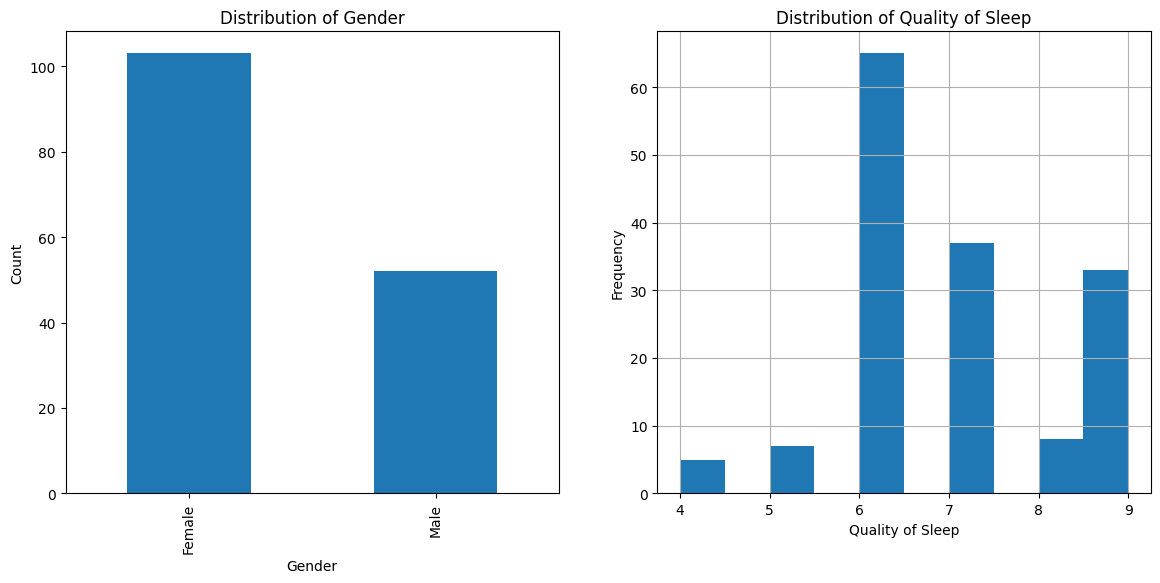

In [ ]:
# Your code here to do a first visualization...
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sleep_data['Gender'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Distribution of Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
sleep_data['Quality of Sleep'].hist(ax=axes[1], bins=10)
axes[1].set_title('Distribution of Quality of Sleep')
axes[1].set_xlabel('Quality of Sleep')
axes[1].set_ylabel('Frequency')
plt.show()


### Observations #1

The histograms provided below represent the frequency of representation in genders and quality of sleep among the sample data. Looking at gender distribution chart and obtaining the percentage for each gender, it shown that the number of female participants far supersede the number of male participants and hence the dataset is more inclined towards female participants. This disparity could be fairly dramatic when gaining a fuller understanding of gender-specific information as well as when inferring data on gender differences in terms of sleep and habits. Alternatively, the histogram for the quality of sleep show that majority of the participants gave a sleep quality ratings of 6, followed by 7 and 9. Most people have moderate to good quality sleep, few have very poor (4 and 5) or very good (8) quality sleep. The results converge to suggest that participants sleep quality is more or less average, and there are slightly less participants who reported very high or very low sleep quality ratings. Such observations might lead to more investigations into the cause and effect relationships of sleep quality as well as consideration of whether the gender difference influences these trends.


<Axes: xlabel='Age', ylabel='Stress Level'>

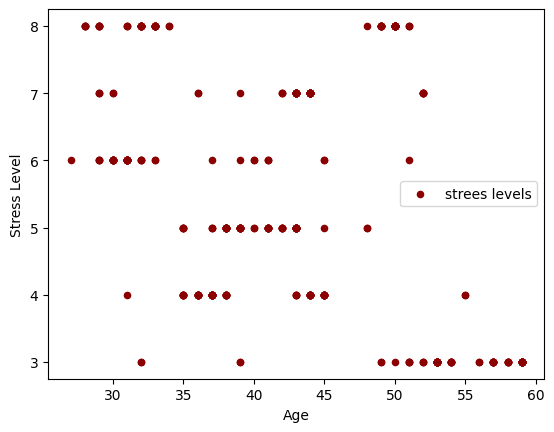

In [ ]:
# More code here to do a second visualization...
data.plot.scatter(x='Age', y='Stress Level', color='DarkRed', label='strees levels')

### Observations #2

As it can be observed from the scatter plot, the level of stress is plotted against age from the given datasets. Thus, from the visualization, it is evident that stress age distribution is not grouped at particular stressful ages. Group 7 and 8 persons experience high stress level, proving that stress is not limited by age, but is experienced by people of different ages from 27- 51 years. Stress levels 3 and 4 must be associated with higher ages, most of all, with ages 50–55, so a participant might experience lesser stress or might cope with stress in a different way. But this cannot be said conclusively because moderate stress indicated by the scores 5 and 6 is also exhibited by children across different ages. All in all, the plot indicates that although stresses can indeed fluctuate for people of different ages, there is only nascent tendency of decreasing stress on the right scale. This study might expand future study if it wanted to look at factors that could be influencing such differences, like, exercising routines, type of work done by the subjects, or their state of health.

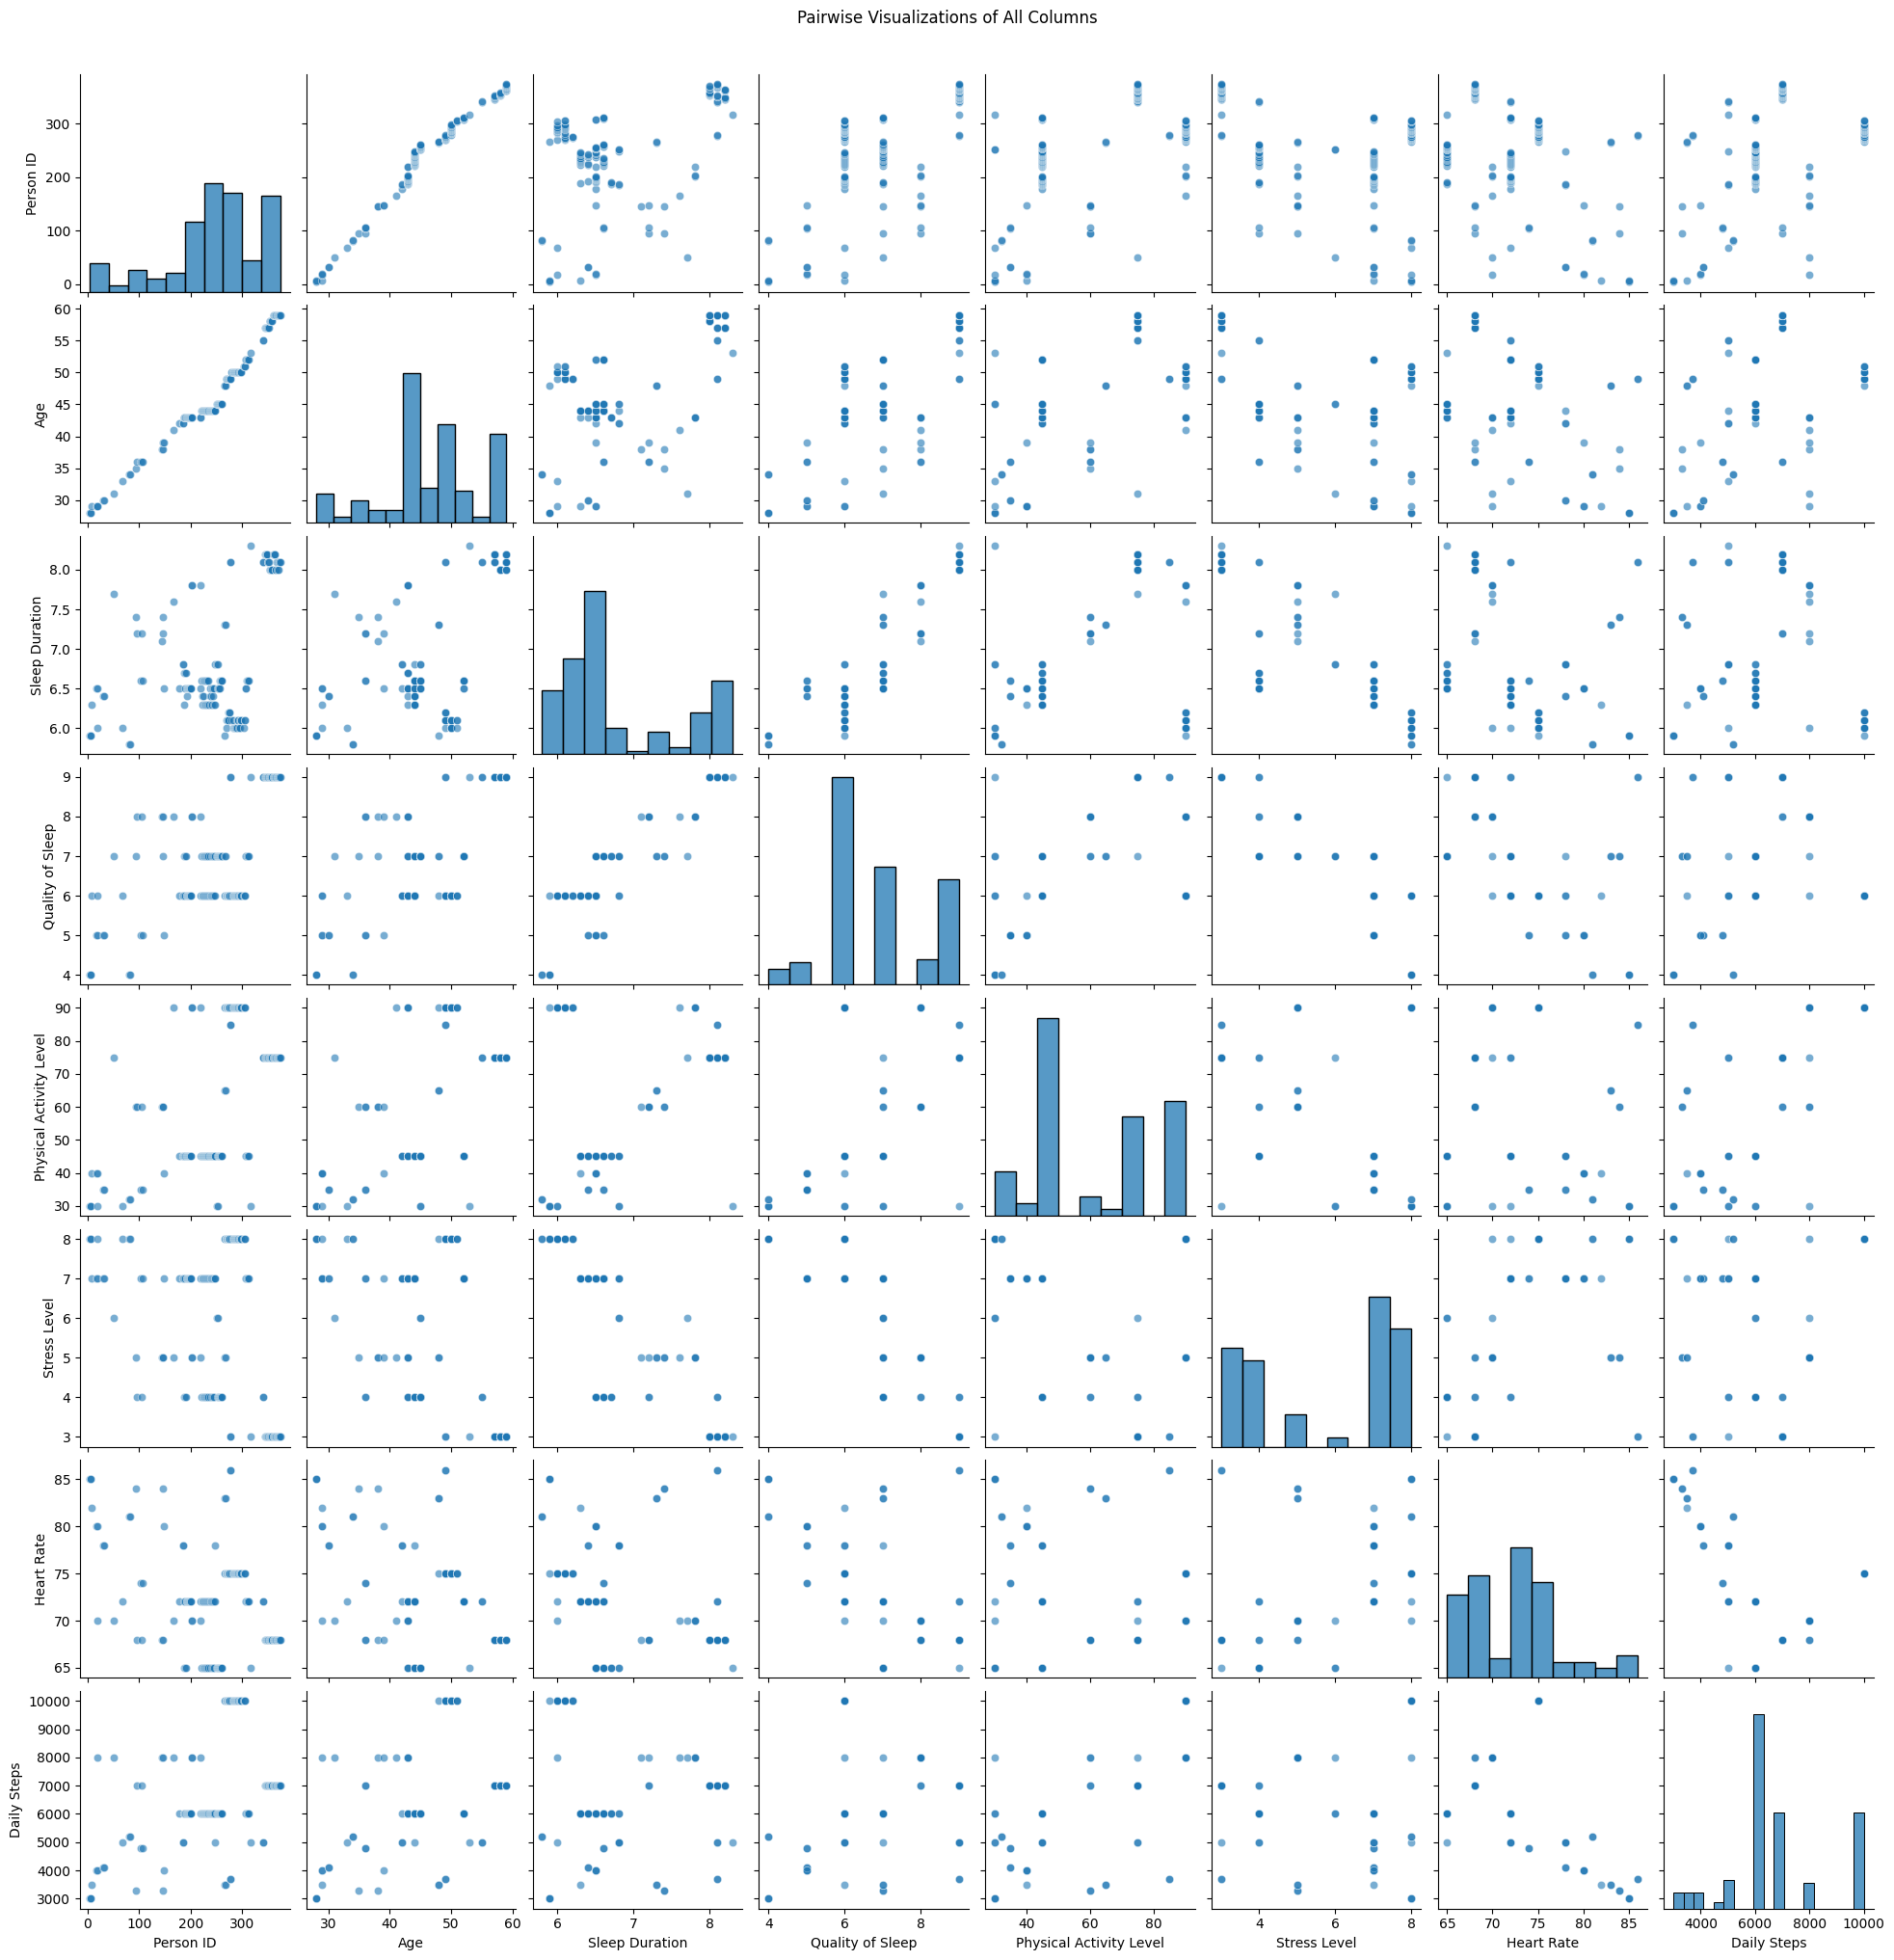

In [ ]:
## visualizing the pair plot to all the columns
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(sleep_data, plot_kws={'alpha': 0.6})

plt.suptitle('Pairwise Visualizations of All Columns', y=1.02)
plt.show()

The pair plot provided above helps in visualizing the relationships between all numerical columns in your dataset. The scatter plot in each cell of the grid demonstrates the relationship of two components; diagonal cell gives a histogram of individual columns. This kind of visualization come in handy to show possible relationship, trend, or anomaly between the variables.

For instance, it can be determined how many hours you sleep and how you correlate it with the stress level or quality of the night's sleep or physical activity level. As for trends, the plots depict whether increased physical activity leads to better sleep, or if a stressed out person has higher heart rate. The histograms appearing in the diagonal area represent the scattering and median features of the variables if they are considered separately.

The information presented in these chart types allows identifying the linearity or non-linearity of the data as well as clusters and outliers in the data set. Nevertheless, careful, systematic scan of the data distills it to encompass a wider range of activity variance that is beneficial for making more detailed statistical analysis and model building, as it indicates where finer comparison could be helpful.



---



## Submitting Your Work

As usual, submit your work using the "Save to GitHub" option